<a href="https://colab.research.google.com/github/MinsooKwak/Kaggle_note/blob/main/Data_science/lung_cancer_analysis_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kaggle 필사 study하기**

참고 링크: https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4/notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm  # 폰트 관련 용도

In [3]:
import warnings
warnings.filterwarnings('ignore')

### 한글 폰트 설치 및 설정

In [4]:
#!sudo apt-get install -y fonts-nanum  ## 폰트설치
#!sudo fc-cache -fv ## 폰트 업데이트
#!rm ~/.cache/matplotlib -rf ## 캐쉬된 matplotlib 폰트 삭제하여 재로딩

In [5]:
# ttflist에 Nanum 글자 들어가는 폰트 있는지 확인하는 코드
f = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
f

['NanumGothic',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquare']

In [6]:
#폰트종류설정
plt.rcParams["font.family"] ='NanumSquare'

# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.13
설정 폰트 글꼴: ['NanumSquare'], 설정 폰트 사이즈: 10.0


In [7]:
path = '/content/drive/MyDrive/text/NanumSquareR.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumSquare


In [8]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.rcParams['axes.unicode_minus']=False
font_path = '/content/drive/MyDrive/text/NanumSquareR.ttf'
fontprop = font_manager.FontProperties(fname=font_path, size=20)

plt.rc('font', family='NanumBarunGothic')

# EDA

In [9]:
df = pd.read_csv('/content/drive/MyDrive/data/kaggle_data/survey_lung_cancer.csv')

In [10]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


이 중 범주형으로 보이는 항목의 unique한 값들을 살펴보도록 하겠다.

In [11]:
print(df['GENDER'].unique())
print(df['LUNG_CANCER'].unique())

['M' 'F']
['YES' 'NO']


### **ABOUT DATASET**

- Gender : M, F
- AGE : patient age
- SMOKING : 2[Yes], 1[No]
- ANXIETY : 2[Yes], 1[No]
- PEER_PRESSURE : 2[Yes], 1[No]
- CHRONIC DISEASE : 2[Yes], 1[No]
- FATIGUE : 2[Yes], 1[No]
- ALLERGY : 2[Yes], 1[No]
- WHEEZIZNG : 2[Yes], 1[No]
- ALCOHOL CONSUMING : 2[Yes], 1[No]
- COUGHING : 2[Yes], 1[No]
- SHROTNESS OF BREATH : 2[Yes], 1[No]
- SWALLOWING DIFFICULTY : 2[Yes], 1[No]
- CHEST PAIN : 2[Yes], 1[No]
- LUNG_CANCER : Yes(Pos), NO(neg)


In [12]:
print(f'현재 {df.shape[0]}개의 dataset이 존재함')
print(f'총 {df.shape[1]}개의 컬럼으로 구성되어 있음')

현재 309개의 dataset이 존재함
총 16개의 컬럼으로 구성되어 있음


### **Data types**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

GENDER, LUNG_CANCER 은 object 형태로, 나머지는 int 형태의 dtype을 가진다.

### **Dataset Summary**

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


-> 위의 내용은 df.descirbe(include=int).T에 대한 내용으로 int형에 대한 내용만 나왔음

In [15]:
# Boxplot 그려서 분포 확인해보면 좋을 듯 
# 1. 이상치 제거 전 (전체 데이터셋)
# 2. 이상치 제거 후 비교

object 형에 관한 내용 살펴보기

In [16]:
df.describe(include=object).T

,count,unique,top,freq
GENDER,309,2,M,162
LUNG_CANCER,309,2,YES,270


### **Null Data/ Drop Duplicate**

In [17]:
for i in df.columns:
  null_rate = df[i].isna().sum()/len(df)*100
  if null_rate > 0:
    print(f"{i}'s null rate : {null_rate.round(2)}%")
  else:
    print(f"No null : {i}")

No null : GENDER
No null : AGE
No null : SMOKING
No null : YELLOW_FINGERS
No null : ANXIETY
No null : PEER_PRESSURE
No null : CHRONIC DISEASE
No null : FATIGUE 
No null : ALLERGY 
No null : WHEEZING
No null : ALCOHOL CONSUMING
No null : COUGHING
No null : SHORTNESS OF BREATH
No null : SWALLOWING DIFFICULTY
No null : CHEST PAIN
No null : LUNG_CANCER


In [18]:
# 결측치의 합을 df형으로 다시 확인
df.isna().sum().to_frame().T

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# 중복 데이터 개수
print(f'중복된 데이터 개수 : {df[df.duplicated()].shape[0]}')

중복된 데이터 개수 : 33


In [20]:
# 중복된 데이터 중 첫번째만 남기고 제거
df.drop_duplicates(keep='first', inplace=True)

print(f'중복된 데이터를 제고하고 남은 데이터 개수는 : {df.shape[0]}')

중복된 데이터를 제고하고 남은 데이터 개수는 : 276


# Visualization

**custom palette for visualization**

In [21]:
sns.set_style('whitegrid')                # whitegrid
sns.set_context('poster', font_scale=.7)  # poster(큰 사이즈), font_scale은 0.7
'''
------------------------------------------------------------------------------
# set_style : 그림의 전반적 모양 스타일링
  background color, grid, spine, tick 정의
  ㄴ default  : darkgrid
  ㄴ 변경     :
          1) Background color : dark, white
          2) Grid             : whitegrid, darkgrid
          3) Despine(축/테두리 제거)
              ㄴ spine : left, right, top, bottom
              ㄴ 1) default : top, right 제거
              ㄴ 2) sns.despine(left=True)  # left도 제거
              ㄴ 3) sns.despine(bottom=True)# bottom도 제거

-------------------------------------------------------------------------------
# set_context : 다양한 매체에 활용할 수 있도록 스타일링
  ㄴ 네 종류의 스케일(사이즈) 선택 가능
  ㄴ 스케일(사이즈) 종류 : paper, notebook, talk, poster
  ㄴ default : notebook
      ㄴ # paper  : 작은 스케일
      ㄴ # poster : 글씨가 조금씩 커짐 

  --------------------------------------------------------------------------
  ### 디테일하게 조정하고 싶을 때:
     sns.set_context()안에 rc 파라미터를 딕셔너리 형태로 넣어줌 (run command)
     ex) sns.set_context("poster", font_scale=1, rc={"grid.linewidth":5})

     ### rc 파라미터 종류
     {'axes.labelsize': 17.6,
      'axes.titlesize': 19.200000000000003,
      'font.size': 19.200000000000003,
      'grid.linewidth': 1.6,
      'legend.fontsize': 16.0,
      'lines.linewidth': 2.8000000000000003,
      'lines.markeredgewidth': 0.0,
      'lines.markersize': 11.200000000000001,
      'patch.linewidth': 0.48,
      'xtick.labelsize': 16.0,
      'xtick.major.pad': 11.200000000000001,
      'xtick.major.width': 1.6,
      'xtick.minor.width': 0.8,
      'ytick.labelsize': 16.0,
      'ytick.major.pad': 11.200000000000001,
      'ytick.major.width': 1.6,
      'ytick.minor.width': 0.8}
'''

'\n------------------------------------------------------------------------------\n# set_style : 그림의 전반적 모양 스타일링\n  background color, grid, spine, tick 정의\n  ㄴ default  : darkgrid\n  ㄴ 변경     :\n          1) Background color : dark, white\n          2) Grid             : whitegrid, darkgrid\n          3) Despine(축/테두리 제거)\n              ㄴ spine : left, right, top, bottom\n              ㄴ 1) default : top, right 제거\n              ㄴ 2) sns.despine(left=True)  # left도 제거\n              ㄴ 3) sns.despine(bottom=True)# bottom도 제거\n\n-------------------------------------------------------------------------------\n# set_context : 다양한 매체에 활용할 수 있도록 스타일링\n  ㄴ 네 종류의 스케일(사이즈) 선택 가능\n  ㄴ 스케일(사이즈) 종류 : paper, notebook, talk, poster\n  ㄴ default : notebook\n      ㄴ # paper  : 작은 스케일\n      ㄴ # poster : 글씨가 조금씩 커짐 \n\n  --------------------------------------------------------------------------\n  ### 디테일하게 조정하고 싶을 때:\n     sns.set_context()안에 rc 파라미터를 딕셔너리 형태로 넣어줌 (run command)\n     ex) sns.set_conte

참조: https://hleecaster.com/python-seaborn-set-style-and-context/

In [22]:
palette=  ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.palplot을 통해 저장한 팔레트 불러올 수 있음

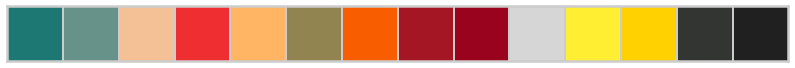

In [23]:
sns.palplot(sns.color_palette(palette))

palette 관련 스터디 추가 참조 자료 : https://hleecaster.com/python-seaborn-color/ 

# Digging Deeper

In [24]:
# df 보존을 위해 copy해 df_temp 만들어 사용
df_temp = df.copy()
df_temp.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


- GENDER 변경 가능
- 1, 2로 카테고리 분류되어 있는 것 변경 가능

In [25]:
# M -> Male, F -> Female
df_temp['GENDER'] = df_temp['GENDER'].replace({'M':'Male', 'F':'Female'})

# 2: Yes , 1: No 변경
for col in df_temp.columns:
  df_temp[col] = df_temp[col].replace({2:'YES', 1:'NO'})

df_temp.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,Male,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,Female,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,Male,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,Female,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


## Lung Cancer 양성

In [26]:
df_temp_pos = df_temp[df_temp['LUNG_CANCER']=='YES']
df_temp_pos.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,Male,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
5,Female,75,NO,YES,NO,NO,YES,YES,YES,YES,NO,YES,YES,NO,NO,YES
6,Male,52,YES,NO,NO,NO,NO,YES,NO,YES,YES,YES,YES,NO,YES,YES
7,Female,51,YES,YES,YES,YES,NO,YES,YES,NO,NO,NO,YES,YES,NO,YES


### 양성인 경우의 Age Distribution

**# subplot() vs. subplots()**

**case1. 하나씩 설정 (subplot)**
- nrows, ncols, index (각 정수는 10보다 작은 값) 

```
plt.subplot(2,1,1)
plt.subplot(2,1,2)
plt.show()
```
- projection 
  - 기본값: None (rectilinear가 입력)
  - True : projection= 'polar'
  - None, 'aitoff', 'hammer','lambert','mollwide','polar','rectilinear', str


**case2. 한번에 설정 (subplots)**

```
plt.subplots(nrow=2, ncols=1)
plt.show()
```




참조 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=heygun&logNo=221520454294

참조2 : https://runebook.dev/ko/docs/matplotlib/_as_gen/matplotlib.pyplot.subplot

참조3 : https://kongdols-room.tistory.com/98

In [27]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.rcParams['axes.unicode_minus']=False
font_path = '/content/drive/MyDrive/text/NanumSquareR.ttf'
fontprop = font_manager.FontProperties(fname=font_path, size=20)

plt.rc('font', family='NanumBarunGothic')

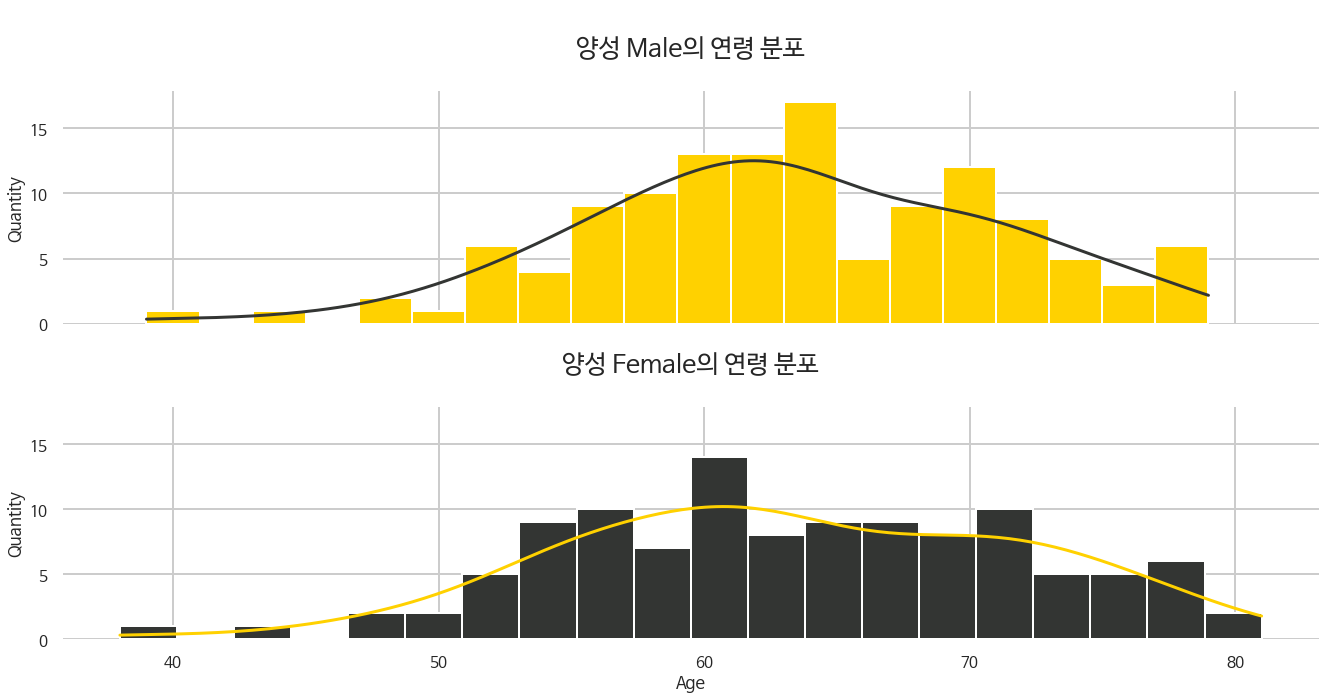

In [28]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,10), sharex=True, sharey=True)
# fig   : figure (전체 subplot을 의미 == 전체 사이즈)
# axes  : 전체 중 낱개 
  ### subplot의 경우는 부분을 지시하는 키워드로 하나의 값(axes)만 받을 수 있음
  ### subplots의 경우는 axes 여러개의 값
# sharex : Xtick의 값을 각각 공유할지 안할지  # sharex=False이면 x축 값 모두 다르게 출력
# sharey : Ytick의 값을 각각 공유할지 안할지  # sharey=False이면 y축 값 모두 다르게 출력


# tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
### 자동으로 명시된 여백(padding)에 관련된 서브플롯 파라미터 조정
    # pad   : figure 모서리와 서브플롯 모서리 사이의 여백(padding)을 설정
    # h_pad : 높이의 여백
    # w_pad : 너비의 여백 
    # rect  : 서브플롯을 넣기 위한 사각형 설정(왼,바닥,오,위)
              # 총 크기 대비 정규화된 값
              # 기본: (0,0,1,1)
plt.tight_layout(pad=4.0)


# 양성 Male의 Age 분포
sns.histplot(df_temp_pos[df_temp_pos['GENDER']=='Male']['AGE'], color=palette[11], kde=True, ax=axes[0], bins=20, alpha=1, fill=True)
axes[0].lines[0].set_color(palette[12])
axes[0].set_title('\n양성 Male의 연령 분포\n', fontsize=25)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Quantity')

# 양성 Female의 Age 분포
sns.histplot(df_temp_pos[df_temp_pos['GENDER']=='Female']['AGE'], color=palette[12], kde=True, ax=axes[1], bins=20, alpha=1, fill=True)
axes[1].lines[0].set_color(palette[11])
axes[1].set_title('\n양성 Female의 연령 분포\n', fontsize=25)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Quantity')

# 축 없애기 (기본: top, right)
sns.despine(left=True, bottom=True)
plt.show()

Male, Female의 두 가지 경우를 합쳐보면

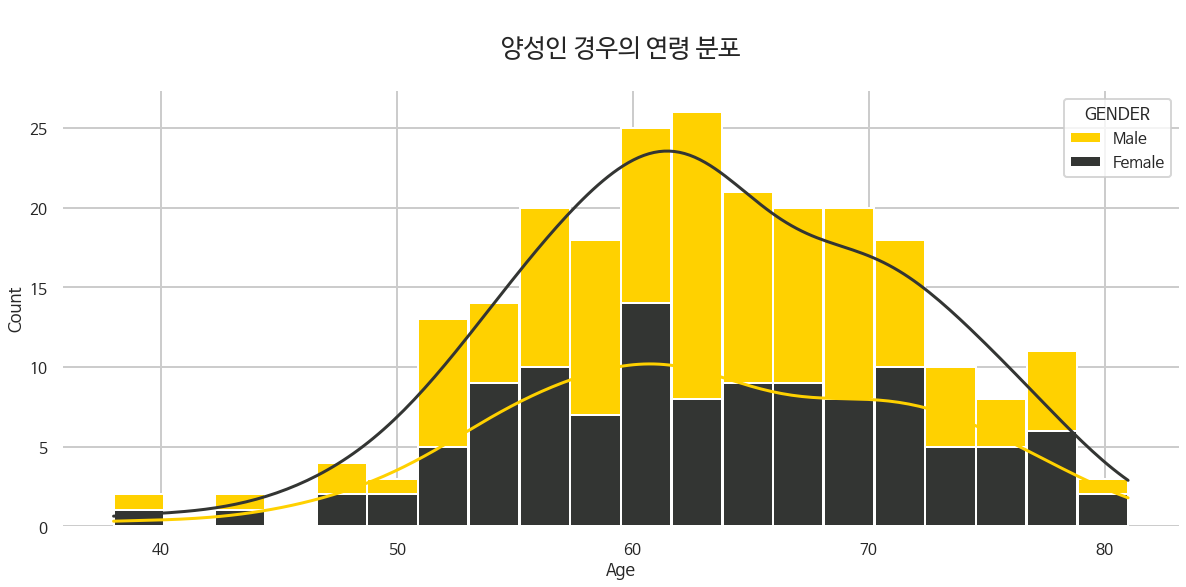

In [29]:
plt.subplots(figsize=(20,8))
p = sns.histplot(data=df_temp_pos, x="AGE", hue="GENDER", 
                 multiple="stack",          # multiple="stack"이용해서 stack할 수 있음
                 palette=palette[11:13],    # 11~13번 색상 사용
                 kde=True, shrink=.99,bins=20, alpha=1, fill=True)

p.axes.lines[0].set_color(palette[11])
p.axes.lines[1].set_color(palette[12])
p.axes.set_title("\n양성인 경우의 연령 분포\n", fontsize=25)
plt.xlabel("Age")
plt.ylabel('Count')

sns.despine(left=True, bottom=True)
plt.show()

### 양성인 경우의 Gender Distribution

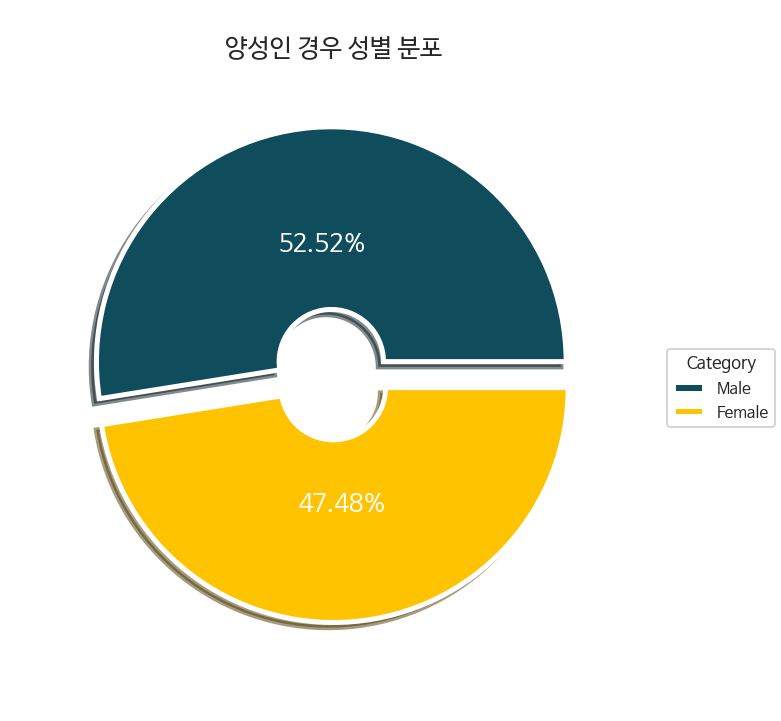

In [30]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.7

wedges, texts, autotexts = plt.pie([len(df_temp_pos[df_temp_pos["GENDER"]=="Male"]["GENDER"]),
                                    len(df_temp_pos[df_temp_pos["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#0f4c5c","#FFC300"], 
                                    shadow = True,
                                    wedgeprops= dict(width = size, edgecolor = "white", linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\n양성인 경우 성별 분포",fontsize=25)
plt.show()

### Gender-wise 양성인 경우

In [31]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


In [32]:
# 3.4 이하일 경우 upgrade
#!pip install matplotlib --upgrade

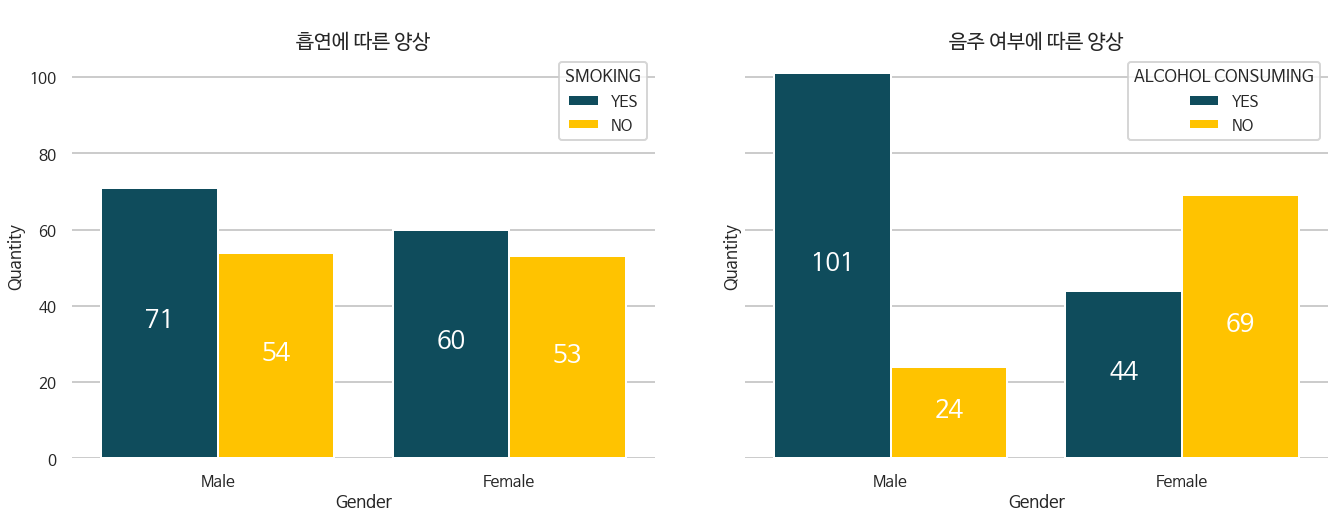

In [33]:
fig, axes = plt.subplots(1,2,figsize=(20,8), sharex=True, sharey=True)
plt.tight_layout(pad=4.0)

# 흡연 여부에 따른 양상
sns.countplot(data=df_temp_pos, x='GENDER', hue='SMOKING', hue_order=['YES','NO'],
              ax=axes[0], palette=["#0f4c5c","#FFC300"], saturation=1)
axes[0].set_title('\n흡연에 따른 양상', fontsize=20)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Quantity')

### matplotlib 3.4 이상부터 사용 가능
for container in axes[0].containers:
  axes[0].bar_label(container, label_type='center', padding=2, size=25, color='white', rotation=0)

# 음주 여부에 따른 양상
sns.countplot(data=df_temp_pos, x='GENDER', hue='ALCOHOL CONSUMING', hue_order=['YES','NO'], ax=axes[1],
              palette=["#0f4c5c","#FFC300"], saturation=1)
axes[1].set_title('\n음주 여부에 따른 양상',fontsize=20)
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Quantity')

### matplotlib 3.4 이상부터 사용 가능
for container in axes[1].containers:
  axes[1].bar_label(container, label_type='center', padding=2, size=25, color='white', rotation=0)

# Spine 없애기
sns.despine(left=True, bottom=True)
plt.show()

### Gender-wise 양성의 증상들

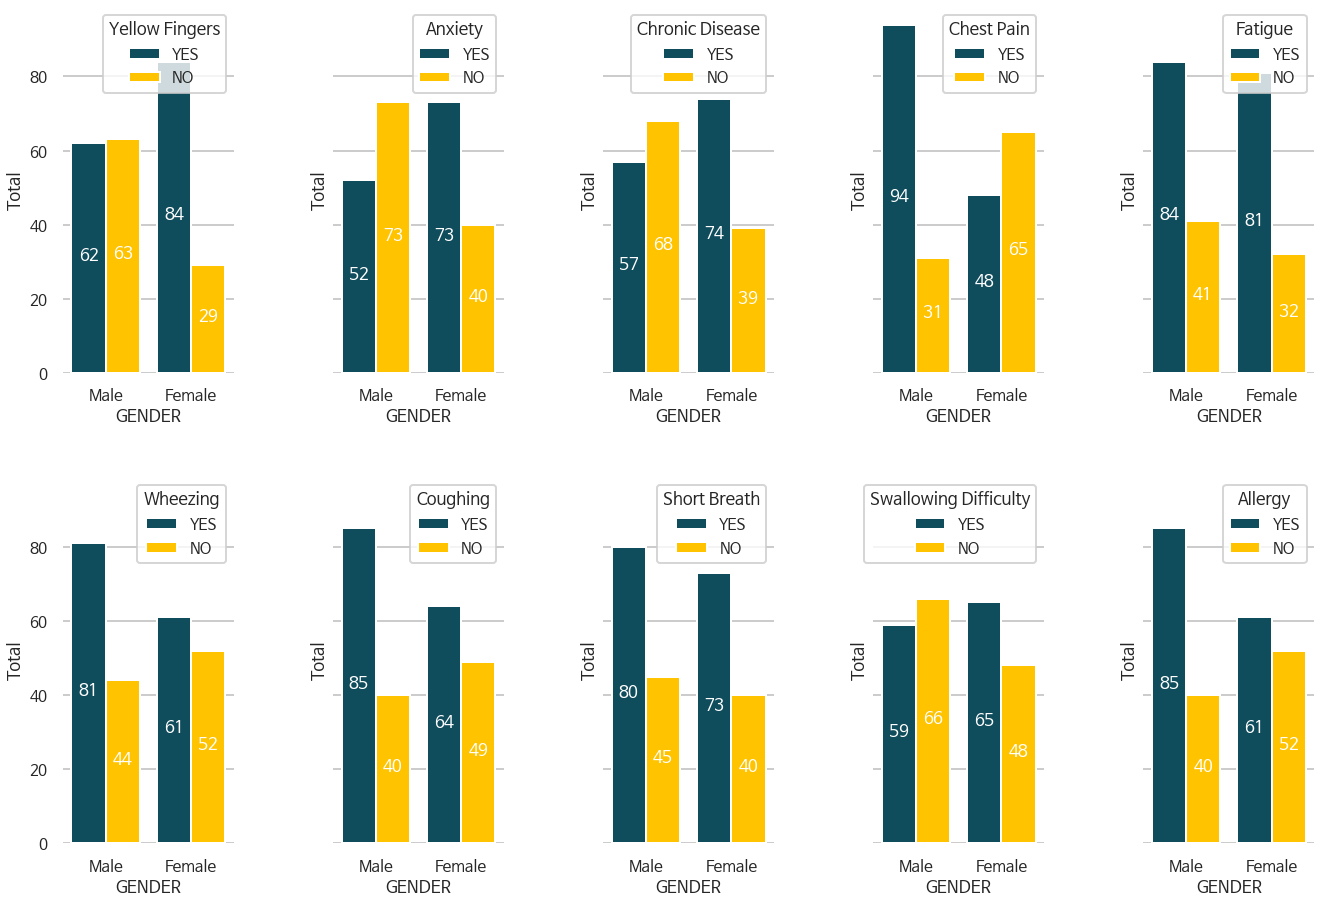

In [34]:
fig, axes = plt.subplots(2,5, figsize=(20,14), sharex=False, sharey=True) # y축만 공유
plt.tight_layout(pad=4.0)

### YELLOW FINGERS
sns.countplot(data=df_temp_pos, x='GENDER', hue='YELLOW_FINGERS', hue_order=['YES','NO'],
              ax=axes[0,0], palette=["#0f4c5c","#FFC300"], saturation=1)
axes[0,0].set_ylabel('Total')
axes[0,0].legend(title='Yellow Fingers', loc='upper right')

for container in axes[0,0].containers:
  axes[0,0].bar_label(container, label_type='center', padding=2, size=17, color='white',rotation=0)

### ANXIETY
sns.countplot(data=df_temp_pos,x="GENDER",hue="ANXIETY",hue_order=['YES','NO'],ax=axes[0,1],
              palette=["#0f4c5c","#FFC300"],saturation=1)
axes[0,1].set_ylabel("Total")
axes[0,1].legend(title="Anxiety",loc="upper right")

for container in axes[0,1].containers:
    axes[0,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

### CHRONIC DISEASE
sns.countplot(data=df_temp_pos,x="GENDER",hue="CHRONIC DISEASE",hue_order=['YES','NO'],
              ax=axes[0,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axes[0,2].set_ylabel("Total")
axes[0,2].legend(title="Chronic Disease",loc="upper right")
for container in axes[0,2].containers:
    axes[0,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

### CHEST PAIN
sns.countplot(data=df_temp_pos,x="GENDER",hue="CHEST PAIN",hue_order=['YES','NO'],
              ax=axes[0,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axes[0,3].set_ylabel("Total")
axes[0,3].legend(title="Chest Pain",loc="upper right")
for container in axes[0,3].containers:
    axes[0,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

### FATIGUE
sns.countplot(data=df_temp_pos,x="GENDER",hue="FATIGUE ",hue_order=['YES','NO'],
              ax=axes[0,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axes[0,4].set_ylabel("Total")
axes[0,4].legend(title="Fatigue",loc="upper right")
for container in axes[0,4].containers:
    axes[0,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

### WHEEZING
sns.countplot(data=df_temp_pos,x="GENDER",hue="WHEEZING",hue_order=['YES','NO'],
              ax=axes[1,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axes[1,0].set_ylabel("Total")
axes[1,0].legend(title="Wheezing",loc="upper right")
for container in axes[1,0].containers:
    axes[1,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

### COUGHING
sns.countplot(data=df_temp_pos,x="GENDER",hue="COUGHING",hue_order=['YES','NO'],
              ax=axes[1,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axes[1,1].set_ylabel("Total")
axes[1,1].legend(title="Coughing",loc="upper right")
for container in axes[1,1].containers:
    axes[1,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

### SHORTNESS OF BREATH
sns.countplot(data=df_temp_pos,x="GENDER",hue="SHORTNESS OF BREATH",hue_order=['YES','NO'],
              ax=axes[1,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axes[1,2].set_ylabel("Total")
axes[1,2].legend(title="Short Breath",loc="upper right")
for container in axes[1,2].containers:
    axes[1,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

### SWALLOWING DIFFICULTY
sns.countplot(data=df_temp_pos,x="GENDER",hue="SWALLOWING DIFFICULTY",hue_order=['YES','NO'],
              ax=axes[1,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axes[1,3].set_ylabel("Total")
axes[1,3].legend(title="Swallowing Difficulty",loc="upper right")
for container in axes[1,3].containers:
    axes[1,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)    

sns.countplot(data=df_temp_pos,x="GENDER",hue="ALLERGY ",hue_order=['YES','NO'],
              ax=axes[1,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axes[1,4].set_ylabel("Total")
axes[1,4].legend(title="Allergy",loc="upper right")
for container in axes[1,4].containers:
    axes[1,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)    

sns.despine(left=True, bottom=True)
plt.show()

## Pearson Correlation

**Categorical Encoding** 

-> categorical 데이터를 numerical 데이터로 변환해야함

- Label Encoding
  - 알파벳 오더 순으로 숫자 할당
  - 랭크가 있음 (순서의 의미가 있을 때)
    - 랭크된 숫자정보가 모델에 반영될 수 있음
  - 고유값의 개수 (One-Hot은 효율적x)
- One-Hot Encoding
  - 목록화해서 개별로 그 목록값에 대한 이진값으로 만드는 방법
  - 순서가 없을 때
  - 고유값의 개수가 많지 않을 때

In [35]:
df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES


2가지의 object 유형에 대한 encoding을 수행해야 함

In [36]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

df['GENDER'] = df['GENDER'].replace({'M':'Male', 'F':'Female'})
# LUNG_CANCER의 경우 랭킹 있음 => Label_Encoding
df['LUNG_CANCER'] = LabelEncoder.fit_transform(df['LUNG_CANCER'])

# GENDER의 경우 우열이 없음 => get_dummies로 dummy encoding (OneHot Encoding)
df = pd.get_dummies(df, columns=['GENDER'])
df.rename(columns={"GENDER_Male":"MALE", "GENDER_Female":"FEMALE"},inplace=True)

df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,FEMALE,MALE
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


**fit_transform() vs transform()**

- **fit_transform():** 
  - train set에만 사용
  - train data의 mean, varience 학습
  - 
```
train data로 학습된 Scaler()의 parameter는 test data scale에 사용됨
```
  - fit_transform()을 test set에 적용한다면
  
    1) test set으로부터 mean, varience 값을 얻게 되는 것 
    
    -> test set도 학습하게 되므로 안됨 (정답지는 학습되면 안됨)

    2) test set이 학습되면 모델이 처음보는 데이터셋에 대해 얼마나 성능이 좋은지 알 수 없게 됨

- **transform():**
  - train data로부터 학습된 mean, varience를 test set에 적용하기 위해 transform() 메서드 사용

참고 : https://deepinsight.tistory.com/165

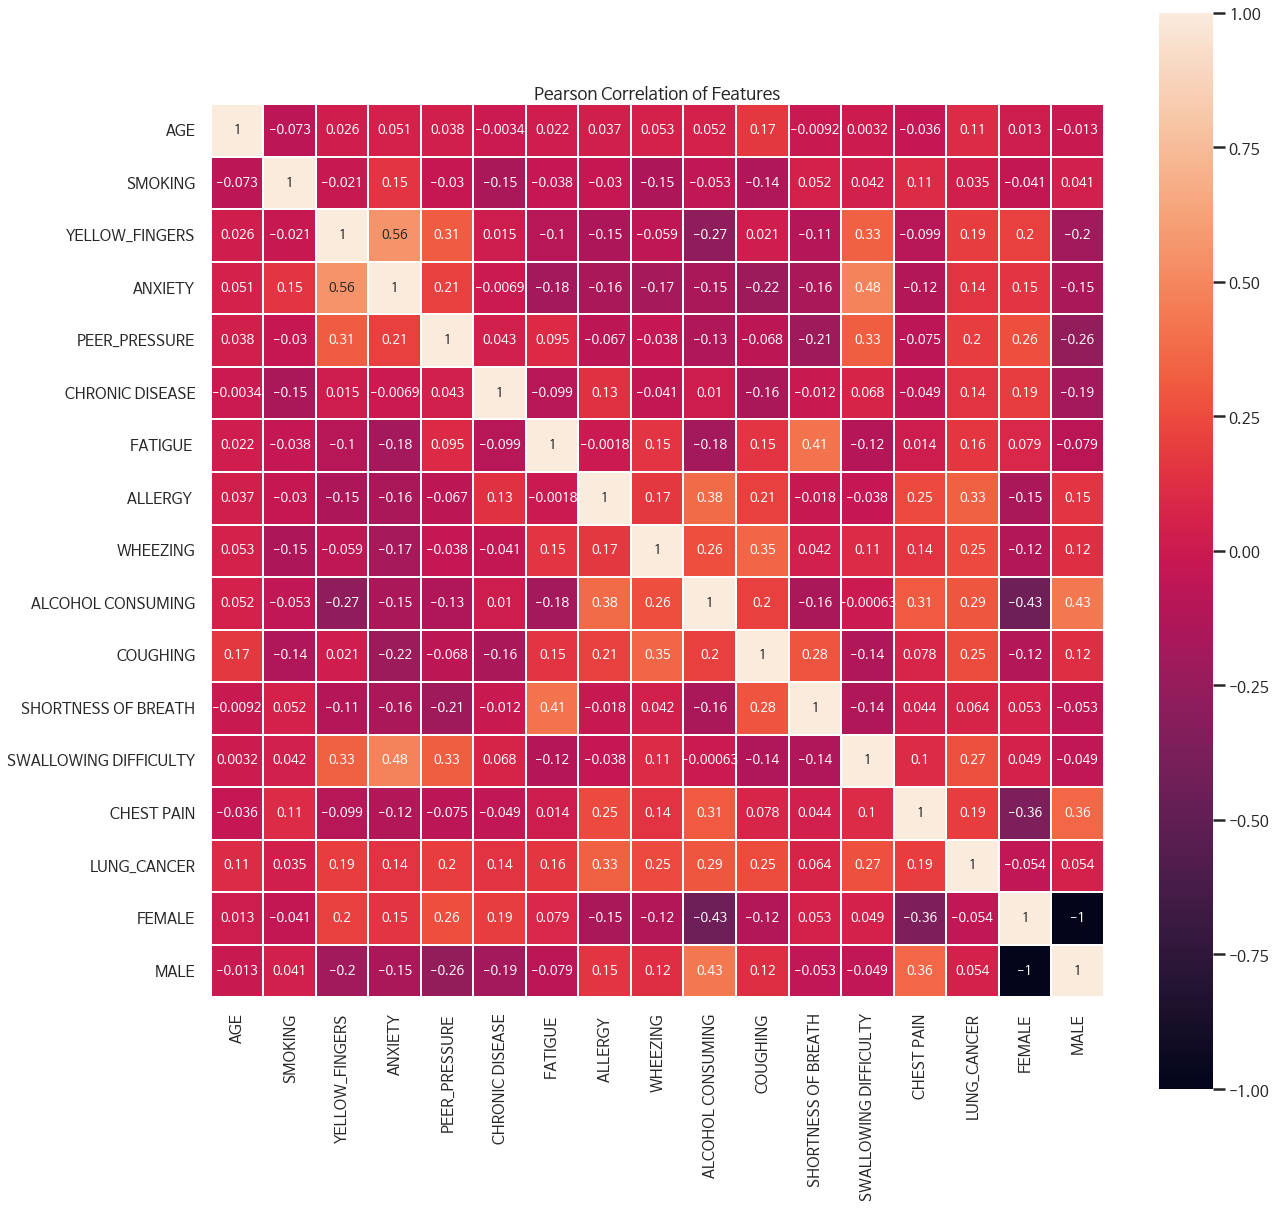

In [37]:
plt.subplots(figsize=(20,20))

sns.heatmap(df.corr(), square=True, cbar_kws=dict(shrink=.99), annot=True,
            vmin=-1, vmax=1, linewidths=0.1, linecolor='white',
            annot_kws=dict(fontsize=13))

plt.title("Pearson Correlation of Features", size=17)
plt.xticks(rotation=90)
plt.show()

# Modeling

## Data Preprocessing for Classification

In [38]:
X = df.drop("LUNG_CANCER", axis=1)
y = df['LUNG_CANCER']

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f'train data shape')
print(f'X_train:{X_train.shape}')
print(f'y_train:{y_train.shape}')
print('-'*30)
print(f'test data shape')
print(f'X_test:{X_test.shape}')
print(f'y_test:{y_test.shape}')

train data shape
X_train:(220, 16)
y_train:(220,)
------------------------------
test data shape
X_test:(56, 16)
y_test:(56,)


## Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr= LogisticRegression()
lr.fit(X_train, y_train)      # train set fit()통해 학습
lr_pred = lr.predict(X_test)  # 학습시켰으니 X_test 예측 저장

# 잘 예측했는지 confusion matrix 통해 확인
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits=2)

print(f'Confusion Matrix : \n\n{lr_conf}')
print(f'\nClassification Report : \n\n{lr_report}')
print(f'\nLogistic Regression Model accuracy : {lr_acc}%')

Confusion Matrix : 

[[ 8  4]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56


Logistic Regression Model accuracy : 92.86%


## Gaussian Naive Bayes Model

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits=2)

print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[ 8  4]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56


The Accuracy of Gaussian Naive Bayes is 91.07 %


## Bernoulli Naive Bayes Model

In [41]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)

bnb_conf = confusion_matrix(y_test, bnb_pred)
bnb_report = classification_report(y_test, bnb_pred)
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)

print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")

Confusion Matrix : 

[[ 8  4]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56


The Accuracy of Bernoulli Naive Bayes is 91.07 %


## Support Vector Machine Model

- 시간복잡도 : 최대 O(n^3) 
  - 데이터셋이 클 경우 주의해야 함

svm 시각화 관련 참조 : http://www.gisdeveloper.co.kr/?p=8180

In [42]:
from sklearn.svm import SVC

svm = SVC(C = 100, gamma = 0.002)
# svm 하이퍼파라미터 설명
  # kernel : 
      # 선형 :'linear'
      # 비선형 : 'rbf', 'poly', 'sigmoid','precomputed'
      # 기본 : 'rbf'
  # C : regulation의 정도 (클수록 L2 panelty 증가)
      # 기본: 1.0
  # degree : 
      # kernel이 poly일때만 유효
      # 커널 함수를 몇차 함수로 지정할지 결정
  # gamma : 
      # 커널함수 조건 : 'rbf','poly','sigmoid'인 경우 유효
      # 커널 개수를 지정하는 하이퍼파라미터
      # 'scale','auto' 중 지정 가능
  # random_state

svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)

print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[ 9  3]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.94      1.00      0.97        44

    accuracy                           0.95        56
   macro avg       0.97      0.88      0.91        56
weighted avg       0.95      0.95      0.94        56


The Accuracy of Support Vector Machine is 94.64 %


가중치 규제(regularization) :
- 과적합 방지 대표적 방법
- 가중치의 값이 커지지 않도록 제한하는 기법

- L1 규제
  - 규제가 커질수록
    - 과소적합됨
    - 가중치값이 0에 가까워짐
  - 손실함수에 가중치의 절대값인 L1 norm 추가
  - 가중치 절댓값을 손실함수에 더하는 것
  - 규제의 양을 조절하는 파라미터를 곱한 후 더해진다
  - 절편은 규제하지 않음
    - 절편은 복잡도에 영향을 주지 않기 때문
    - 어떤 방향으로 이동시킬 뿐
  - Lasso(라쏘 모델) : 회귀 + L1 regularization

- L2 규제
  - 손실함수에 가중치에 대한 L2 norm의 제곱을 더함
  - 규제가 커지면
    - 과소적합이 심해지지 않음
    - 따라서 L2 규제 많이 사용함

참고: https://rdmkyg.blogspot.com/2021/06/regularization-l1.html

## Random Forest Model

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfg.fit(X_train, y_train)
rfg_pred = rfg.predict(X_test)

rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)

print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[ 6  6]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.88      1.00      0.94        44

    accuracy                           0.89        56
   macro avg       0.94      0.75      0.80        56
weighted avg       0.91      0.89      0.88        56


The Accuracy of Random Forest Classifier is 89.29 %


## K Nearest Neighbors Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)

print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

Confusion Matrix : 

[[12  0]
 [ 2 42]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.95      0.98        44

    accuracy                           0.96        56
   macro avg       0.93      0.98      0.95        56
weighted avg       0.97      0.96      0.97        56


The Accuracy of K Nearest Neighbors Classifier is 96.43 %


## Extreme Gradient Boosting Model

In [45]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_conf = confusion_matrix(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)

print(f"Confusion Matrix : \n\n{xgb_conf}")
print(f"\nClassification Report : \n\n{xgb_report}")
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier is {xgb_acc} %")

Confusion Matrix : 

[[ 6  6]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.88      1.00      0.94        44

    accuracy                           0.89        56
   macro avg       0.94      0.75      0.80        56
weighted avg       0.91      0.89      0.88        56


The Accuracy of Extreme Gradient Boosting Classifier is 89.29 %


## Neural Network Architecture

In [46]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [47]:
regularization_parmeter = 0.003

neural_model = Sequential([
                          # Unit 32
                          tf.keras.layers.Dense(units=32, 
                              input_dim=(X_train.shape[-1]),
                              activation='relu',
                              kernel_regularizer= regularizers.l1(regularization_parmeter)),
                          # Unit 64
                          tf.keras.layers.Dense(units=64, activation='relu',
                              kernel_regularizer= regularizers.l1(regularization_parmeter)),
                          # Unit 128
                          tf.keras.layers.Dense(units=128, activation='relu',
                              kernel_regularizer= regularizers.l1(regularization_parmeter)),
                          # Dropout
                          tf.keras.layers.Dropout(0.2),
                          # Unit 16
                          tf.keras.layers.Dense(units=16, activation='relu',
                              kernel_regularizer= regularizers.l1(regularization_parmeter)),
                          # sigmoid
                          tf.keras.layers.Dense(units=1, activation='sigmoid',
                              kernel_regularizer= regularizers.l1(regularization_parmeter))])

print(neural_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,057
Trainable params: 13,057
Non-traina

In [48]:
# callback 만들기
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    if (logs.get('accuracy')==1.0):
      print('\nAccuracy is 100%, so conceling training!')
      self.model.stop_training =True

callbacks= myCallback()

neural_model.compile(optimizer = Adam(learning_rate = 0.001),
                     loss = 'binary_crossentropy',
                     metrics=['accuracy'])

history = neural_model.fit(X_train, y_train,
                           epochs=150,
                           verbose=1,
                           batch_size=32,
                           validation_data = (X_test, y_test),
                           callbacks=[callbacks])

Epoch 1/150
7/7 [==============================] - 4s 137ms/step - loss: 4.4597 - accuracy: 0.5409 - val_loss: 4.3040 - val_accuracy: 0.7857
Epoch 2/150
7/7 [==============================] - 0s 19ms/step - loss: 4.1413 - accuracy: 0.8682 - val_loss: 4.0503 - val_accuracy: 0.7857
Epoch 3/150
7/7 [==============================] - 0s 15ms/step - loss: 3.8633 - accuracy: 0.8818 - val_loss: 3.8264 - val_accuracy: 0.7857
Epoch 4/150
7/7 [==============================] - 0s 24ms/step - loss: 3.6178 - accuracy: 0.8818 - val_loss: 3.6358 - val_accuracy: 0.7857
Epoch 5/150
7/7 [==============================] - 0s 19ms/step - loss: 3.3985 - accuracy: 0.8818 - val_loss: 3.4475 - val_accuracy: 0.7857
Epoch 6/150
7/7 [==============================] - 0s 16ms/step - loss: 3.1895 - accuracy: 0.8818 - val_loss: 3.2523 - val_accuracy: 0.7857
Epoch 7/150
7/7 [==============================] - 0s 16ms/step - loss: 3.0057 - accuracy: 0.8818 - val_loss: 3.0583 - val_accuracy: 0.7857
Epoch 8/150
7/7 [==

In [49]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,4.459685,0.540909,4.303969,0.785714
1,4.141340,0.868182,4.050296,0.785714
2,3.863278,0.881818,3.826359,0.785714
3,3.617760,0.881818,3.635788,0.785714
4,3.398521,0.881818,3.447460,0.785714
...,...,...,...,...
145,0.257612,0.950000,0.339522,0.892857
146,0.259945,0.950000,0.338274,0.875000
147,0.256700,0.945455,0.337353,0.892857
148,0.258195,0.945455,0.337670,0.892857


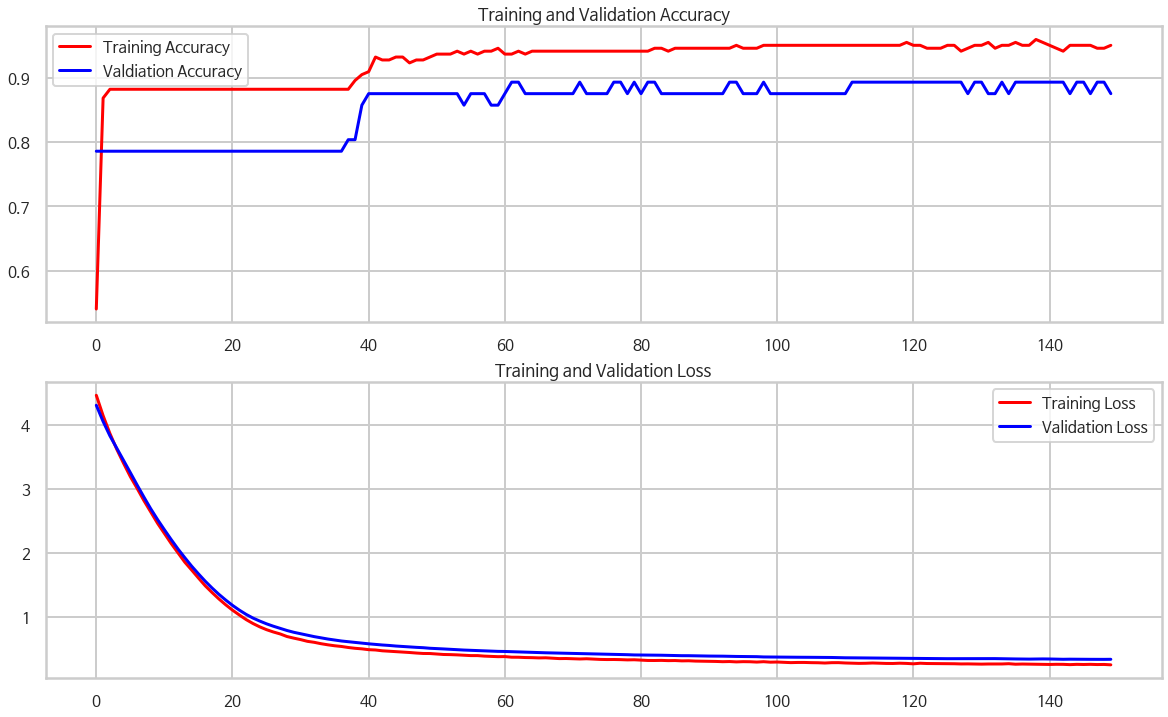

In [50]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
plt.plot(epochs, acc, "red", label='Training Accuracy')
plt.plot(epochs, val_acc, "blue", label='Valdiation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

plt.subplot(2,1,2)
plt.plot(epochs, loss, "red", label='Training Loss')
plt.plot(epochs, val_loss, "blue", label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()